In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import imshow
from joblib import dump, load
import copy
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from tensorflow.keras.datasets import mnist
from sklearn.metrics import mean_squared_error

# <font color='blue'> Classification EMNIST dataset </font>

In [59]:
tr=pd.read_csv("D:\\A.document\\A.opencv\\A.Python\\datasets\\MNIST\\emnist-digits-train.csv",header=None)
tr

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# te=pd.read_csv("D:\\A.my documents\\A.opencv\\A.Python\\datasets\\MNIST\\mnist_test.csv")
# te

In [60]:
x_train=tr.drop(tr.columns[[0]],axis=1)
#x_test=te.drop(te.columns[[0]],axis=1)
print(x_train)
#print(x_test)

        1    2    3    4    5    6    7    8    9    10   ...  775  776  777  \
0         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
239995    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239996    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239997    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239998    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239999    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

        778  779  780  781  782  783  7

In [63]:
x_train=np.array(x_train)
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_train.shape

(240000, 28, 28, 1)

In [10]:
xtr=[]
for inx in range(len(tr)):
    d=x_train.iloc[inx,:]
    d=np.array(d)
    xtr=d.reshape(28,28)
#plt.imshow(xtr[0],cmap='gray')

In [11]:
xtr.shape

(28, 28)

In [41]:
y_train=tr.iloc[:,0]
print(y_train)
# y_test=te.iloc[:,0]
# print(y_test)

0         8
1         9
2         6
3         3
4         6
         ..
239995    4
239996    2
239997    1
239998    1
239999    0
Name: 0, Length: 240000, dtype: int64


In [15]:
x_train.shape

(59999, 784)

In [17]:
#x_test.shape

In [42]:
x_train=x_train/255
#x_test=x_test/255

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2,random_state = 0)

In [21]:
X_train.shape

(47999, 784)

In [22]:
y_train.shape

(47999,)

In [52]:
y_test.shape

(48000,)

In [46]:
digits1 = RandomForestClassifier(n_estimators=150,max_depth=9, random_state=0)
digits1.fit(X_train, y_train)
y_pred=digits1.predict(X_test)
print(y_pred)

[1 8 6 ... 6 5 7]


In [26]:
dump(digits1, 'RF_M.joblib')

['RF_M.joblib']

In [27]:
RF_Model=load('RF_M.joblib')
y_pred1=RF_Model.predict(X_test)
y_pred1

array([3, 6, 6, ..., 7, 6, 5], dtype=int64)

In [54]:
# y_test

In [22]:
y_pred

array([3, 6, 6, ..., 7, 6, 5], dtype=int64)

In [47]:
acc=accuracy_score(y_test,y_pred)
acc

0.947625

In [58]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:',mse)

Mean squared error: 0.8574166666666667


[5]


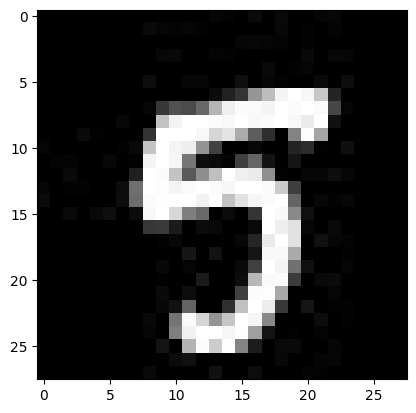

In [57]:
img3_1=cv2.imread('D:\\A.document\\A.opencv\\A.Python\\MNIST\\sample\\1022.jpg')

img2=copy.copy(img3_1)
img2=resize(img2,(28,28,1))

img2=np.array(img2).reshape(-1,784)

img2=img2/255.0
#img2.shape
y_pred_test=digits1.predict(img2)
print(y_pred_test)
plt.imshow(img3_1)